In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Generate random data for demonstration
np.random.seed(0)
years = [2019, 2020, 2021, 2022, 2023]  # Updated years to be more recent and 5 years of data
districts = ['BAGALKOT', 'BANGALORE', 'BELGAUM', 'BELLARY', 'BIDAR']
data = {
    'AdminYear': years,
    'BAGALKOT': np.random.randint(0, 100, size=len(years)),
    'BANGALORE': np.random.randint(0, 100, size=len(years)),
    'BELGAUM': np.random.randint(0, 100, size=len(years)),
    'BELLARY': np.random.randint(0, 100, size=len(years)),
    'BIDAR': np.random.randint(0, 100, size=len(years)),
}

# Convert to DataFrame and set index
pivot_data = pd.DataFrame(data).set_index('AdminYear')

In [2]:
pivot_data.head()

,BAGALKOT,BANGALORE,BELGAUM,BELLARY,BIDAR
AdminYear,,,,,
2019,44,9,70,65,81
2020,47,83,88,39,37
2021,64,21,88,87,25
2022,67,36,12,46,77
2023,67,87,58,88,72


In [6]:
# Dictionary to store predictions
predictions = {}

# Iterate over each district
for district in pivot_data.columns:
    try:
        # Extract the time series data for the district
        ts = pivot_data[district]

        # Ensure there are enough data points to train the model
        if len(ts.dropna()) >= 2:
            print(f"Modeling {district} with {len(ts.dropna())} data points")

            # SARIMA model with seasonal_order=(1, 1, 1, 1) for yearly data
            model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 2))
            model_fit = model.fit(disp=False)  # disp=False to avoid warning about convergence

            # Forecasting one step ahead
            forecast = model_fit.get_forecast(steps=1)
            predictions[district] = forecast.predicted_mean.iloc[0]

        else:
            print(f"Not enough data points for {district}. Skipping modeling.")

    except Exception as e:
        print(f"Error in modeling {district}: {str(e)}")

Modeling BAGALKOT with 5 data points
Modeling BANGALORE with 5 data points
Modeling BELGAUM with 5 data points
Modeling BELLARY with 5 data points
Modeling BIDAR with 5 data points


/home/ramachandra/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ramachandra/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ramachandra/.local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/ramachandra/.local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observ

In [7]:
# Convert predictions to a DataFrame
predictions_df = pd.DataFrame.from_dict(predictions, orient='index', columns=['predicted_students_enrolled'])
predictions_df.index.name = 'DISTRICT'

In [8]:
predictions_df.head()

,predicted_students_enrolled
DISTRICT,
BAGALKOT,69.999308
BANGALORE,-8.132187
BELGAUM,-78.329966
BELLARY,47.224053
BIDAR,53.740192


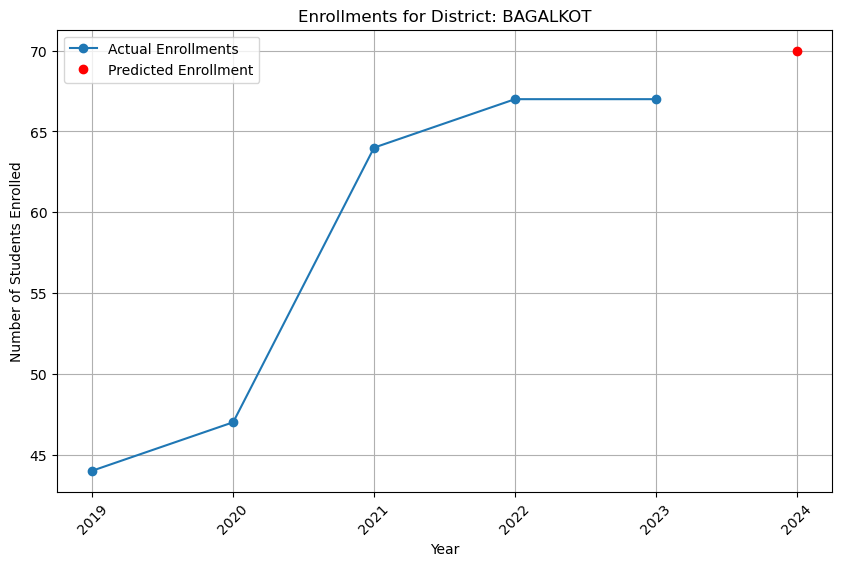

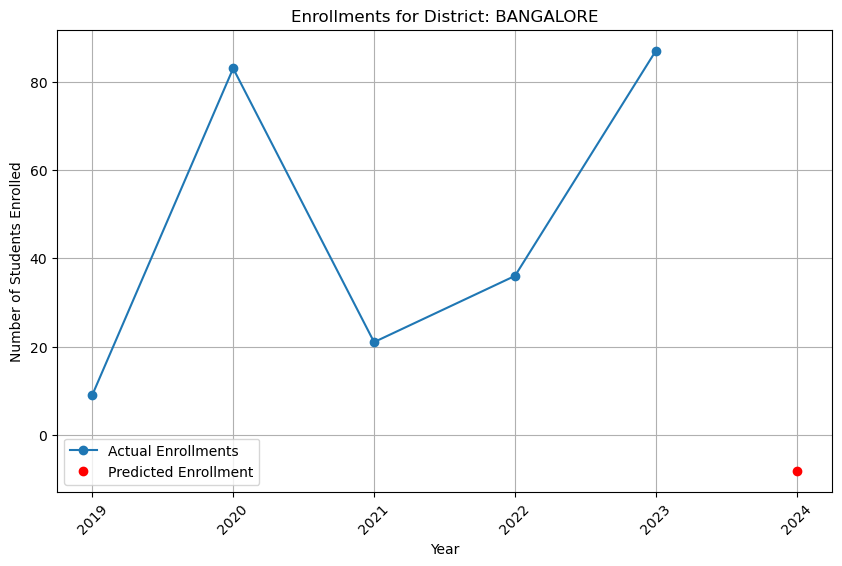

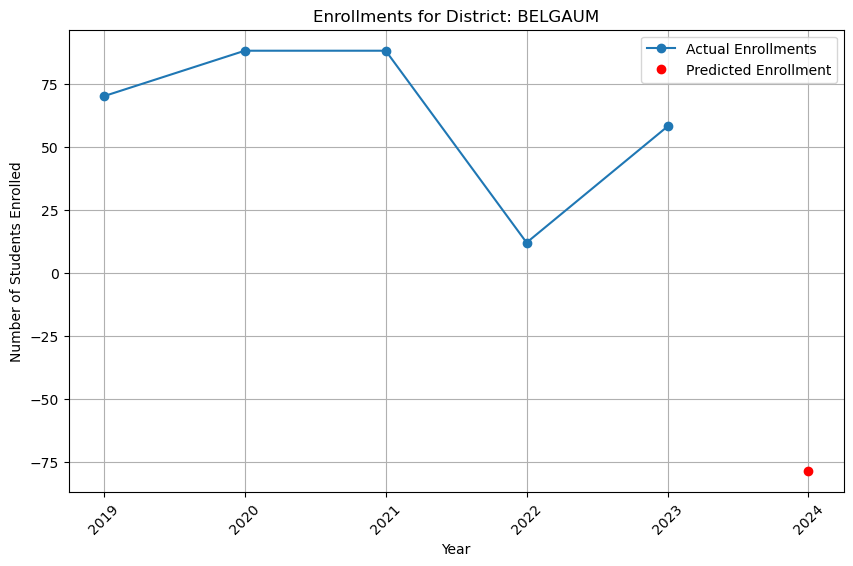

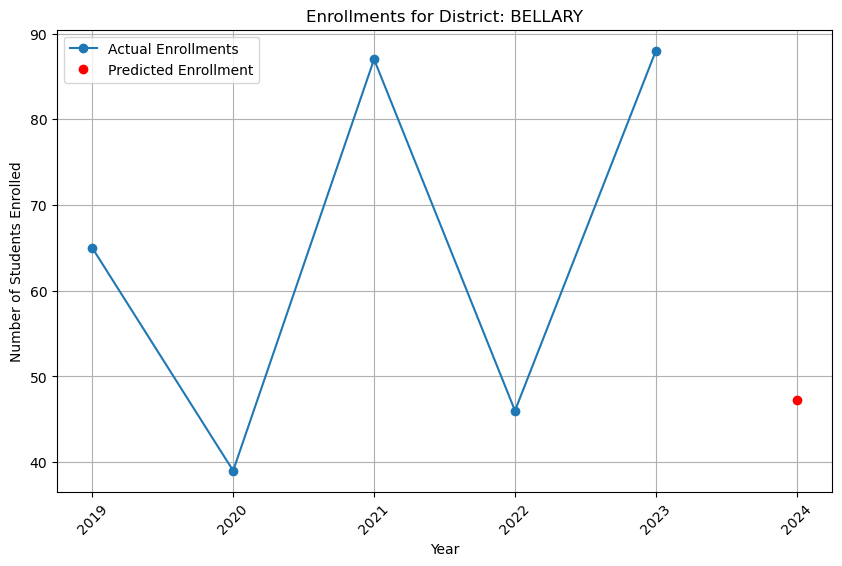

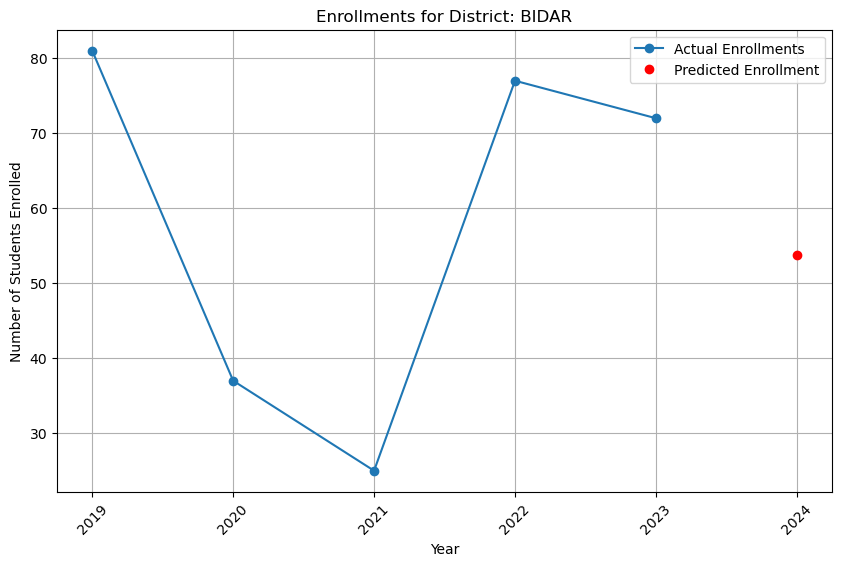

In [9]:
# Optionally, plot the predictions for each district
for district in predictions_df.index:
    ts = pivot_data[district].dropna()
    plt.figure(figsize=(10, 6))
    plt.plot(ts.index, ts, label='Actual Enrollments', marker='o')
    if district in predictions:
        plt.plot(ts.index[-1] + 1, predictions[district], 'ro', label='Predicted Enrollment')
    plt.title(f'Enrollments for District: {district}')
    plt.xlabel('Year')
    plt.ylabel('Number of Students Enrolled')
    plt.xticks(list(ts.index) + [ts.index[-1] + 1], rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()